In [1]:
import numpy as np

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow import keras
from IPython.display import Image
from tensorflow.keras.applications import imagenet_utils

/Users/mahsa/miniconda3/envs/CV/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
mobileNetModel = tf.keras.applications.mobilenet.MobileNet()

Metal device set to: Apple M2


2023-10-24 12:56:05.038823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-24 12:56:05.039101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
from PIL import Image

image_path = 'dataSamples/'

def prepare_image(file):
    img = Image.open(image_path + file)
    img = img.resize((224, 224))  # Resize the image to (224, 224)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


In [5]:
image_file_name = 'Sample11.JPG'

In [6]:
preprocessed_image = prepare_image(image_file_name)

In [7]:
results = mobileNetModel.predict(preprocessed_image)

1/1 [==============================] - 0s 264ms/step


2023-10-24 12:56:05.644386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [8]:
imagenet_utils.decode_predictions(results)

[[('n02123045', 'tabby', 0.7061326),
  ('n02124075', 'Egyptian_cat', 0.13145643),
  ('n02123159', 'tiger_cat', 0.02778089),
  ('n02106166', 'Border_collie', 0.022928758),
  ('n02096585', 'Boston_bull', 0.013532394)]]

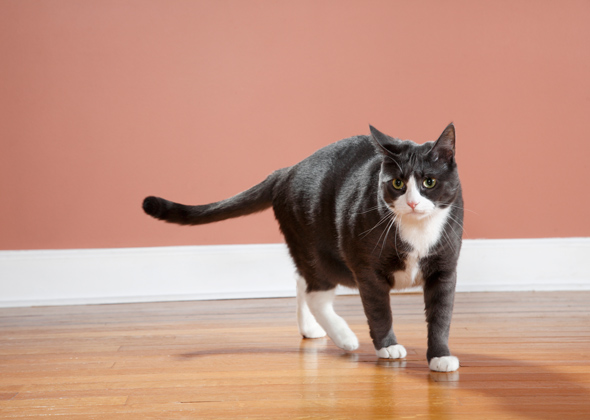

In [9]:
Image.open(image_path + image_file_name)